In [15]:
import time
import yaml
import os
import torch
from utils.IO_func import read_file_list, load_binary_file, array_to_binary_file, load_Haskins_SSR_data
from shutil import copyfile
from utils.transforms import Transform_Compose
from utils.transforms import FixMissingValues
import IPython
import matplotlib.pyplot as plt

In [4]:
def containsNumber(value):
    for character in value:
        if character.isdigit():
            return True
    return False

In [54]:
def data_processing():

    '''
    Load in data from all speakers involved, apply feature extraction, 
    save them into binary files in the current_exp folder, 
    so that data loadin will be accelerated a lot.

    '''

    config_path = 'conf/SSR_conf.yaml'       
    config = yaml.load(open(config_path, 'r'), Loader=yaml.FullLoader)

    
    transforms = [FixMissingValues()] # default transforms
    data_path = config['corpus']['path']
    fileset_path = os.path.join(data_path, 'filesets')
    SPK_list = config['data_setup']['spk_list']
    ################ Articulatory data processing #################
    sel_sensors = config['articulatory_data']['sel_sensors']
    sel_dim = config['articulatory_data']['sel_dim']  

    transforms_all = Transform_Compose(transforms)
    
    bad_sample_list = []
    
    for SPK in SPK_list:
        out_folder_SPK = SPK
        if not os.path.exists(out_folder_SPK):
            os.makedirs(out_folder_SPK)

        fileset_path_SPK = os.path.join(fileset_path, SPK)
        file_id_list = read_file_list(os.path.join(fileset_path_SPK, 'file_id_list.scp'))

        for file_id in file_id_list:
            data_path_spk = os.path.join(data_path, file_id[:3])
            mat_path = os.path.join(data_path_spk, 'data/'+ file_id + '.mat')
            EMA, fs_ema, wav, sent, phone_label, word_label, word_label_ms = load_Haskins_SSR_data(mat_path, file_id, sel_sensors, sel_dim)
            EMA = transforms_all(EMA) 
            EMA_out_dir = os.path.join(out_folder_SPK, file_id + '.ema')
            PHO_out_dir = os.path.join(out_folder_SPK, file_id + '.phn')
            
            if containsNumber(sent[0]) == True:
                bad_sample_list.append(file_id)
                
            
    return sent
            #array_to_binary_file(EMA, EMA_out_dir)
            #torch.save(WAV, WAV_out_dir)

In [126]:
config_path = 'conf/SSR_conf.yaml'       
config = yaml.load(open(config_path, 'r'), Loader=yaml.FullLoader)


transforms = [FixMissingValues()] # default transforms
data_path = config['corpus']['path']
fileset_path = os.path.join(data_path, 'filesets')
SPK_list = config['data_setup']['spk_list']
################ Articulatory data processing #################
sel_sensors = config['articulatory_data']['sel_sensors']
sel_dim = config['articulatory_data']['sel_dim']  

file_id = 'M04_B03_S12_R01_F'
data_path_spk = os.path.join(data_path, file_id[:3])
mat_path = os.path.join(data_path_spk, 'data/'+ file_id + '.mat')
EMA, fs_ema, wav, sent, phone_label, word_label, word_label_ms = load_Haskins_SSR_data(mat_path, file_id, sel_sensors, sel_dim)

print(sent)
print(phone_label)
print(word_label_ms)

['S14_sen12_HS03_B01_R01_0137_01']
[[(array(['sp'], dtype='<U2'), array([[0. , 0.2]]))
  (array(['HE'], dtype='<U2'), array([[0.2       , 0.23171795]]))
  (array(['SAID'], dtype='<U4'), array([[0.23171795, 0.3640314 ]]))
  (array(['THE'], dtype='<U3'), array([[0.3640314 , 0.42389534]]))
  (array(['SAME'], dtype='<U4'), array([[0.42389534, 0.63341915]]))
  (array(['PHRASE'], dtype='<U6'), array([[0.63341915, 0.87287494]]))
  (array(['THIRTY'], dtype='<U6'), array([[0.87287494, 1.10235339]]))
  (array(['TIMES'], dtype='<U5'), array([[1.10235339, 1.56131031]]))
  (array(['sp'], dtype='<U2'), array([[1.56131031, 1.76131031]]))]]
[[(array(['sp'], dtype='<U2'), array([[0. , 0.2]]))
  (array(['SHH'], dtype='<U3'), array([[0.2      , 0.2238802]]))
  (array(['IY1'], dtype='<U3'), array([[0.2238802 , 0.23171795]]))
  (array(['S'], dtype='<U1'), array([[0.23171795, 0.29419013]]))
  (array(['EH1'], dtype='<U3'), array([[0.29419013, 0.3241221 ]]))
  (array(['D'], dtype='<U1'), array([[0.3241221, 0.

In [55]:
sent = data_processing()

In [74]:
print(sent[0])

When you hear the bell, come quickly.


In [ ]:
text_file = open("sample.txt", "w")
n = text_file.write('Welcome to pythonexamples.org')
text_file.close()

In [78]:
def save_word_label(word_label, save_path):
    punctuations_to_remove = ',?.!/;:~'
    
    for char in word_label:
        if char in punctuations_to_remove:
            word_label = word_label.replace(char,'')
    
    f = open(save_path, 'w')
    n = f.write(word_label)
    f.close()
    
save_word_label(sent[0], 'word.txt')  

In [21]:
print(phone_label)

[[(array(['sp'], dtype='<U2'), array([[0. , 0.2]]))
  (array(['HH'], dtype='<U2'), array([[0.2       , 0.28979592]]))
  (array(['W'], dtype='<U1'), array([[0.28979592, 0.32970522]]))
  (array(['EH1'], dtype='<U3'), array([[0.32970522, 0.35963719]]))
  (array(['N'], dtype='<U1'), array([[0.35963719, 0.40952381]]))
  (array(['Y'], dtype='<U1'), array([[0.40952381, 0.47936508]]))
  (array(['UW1'], dtype='<U3'), array([[0.47936508, 0.5292517 ]]))
  (array(['HH'], dtype='<U2'), array([[0.5292517 , 0.58911565]]))
  (array(['IH1'], dtype='<U3'), array([[0.58911565, 0.64897959]]))
  (array(['R'], dtype='<U1'), array([[0.64897959, 0.72879819]]))
  (array(['DH'], dtype='<U2'), array([[0.72879819, 0.78866213]]))
  (array(['AH0'], dtype='<U3'), array([[0.78866213, 0.8185941 ]]))
  (array(['B'], dtype='<U1'), array([[0.8185941 , 0.91836735]]))
  (array(['EH1'], dtype='<U3'), array([[0.91836735, 0.97823129]]))
  (array(['L'], dtype='<U1'), array([[0.97823129, 1.25759637]]))
  (array(['K'], dtype='<U

In [71]:
def save_phone_label(phone_label, save_path):
    import re
    phone_time_list = phone_label[0]
    idx = 0
    with open(save_path, 'w') as f:        
        for phone, t in phone_time_list:
            phone_new = re.sub(r'[0-9]+', '', phone[0])
            f.write(phone_new)
            f.write('\t')
            f.write(str(t[0][0]))
            f.write('\t')
            f.write(str(t[0][1]))
            if idx < len(phone_time_list):
                f.write('\n')
                idx += 1
    
save_phone_label(phone_label, 'phone.txt')    

In [80]:
phone_list_39 = ['aa','ae','ah','ao','aw','ay','b','ch','d','dh','eh','er','ey',
             'f','g','hh','ih','iy','jh','k','l','m','n','ng','ow','oy','p','r','s','sh','t','th','uh',
             'uw','v','w','y','z','zh']

PHONE_LIST_39 = [pho.upper() for pho in phone_list_39] # upper-case

print(PHONE_LIST_39)

['AA', 'AE', 'AH', 'AO', 'AW', 'AY', 'B', 'CH', 'D', 'DH', 'EH', 'ER', 'EY', 'F', 'G', 'HH', 'IH', 'IY', 'JH', 'K', 'L', 'M', 'N', 'NG', 'OW', 'OY', 'P', 'R', 'S', 'SH', 'T', 'TH', 'UH', 'UW', 'V', 'W', 'Y', 'Z', 'ZH']


In [81]:
for P in PHONE_LIST_39:
    print(P)

AA
AE
AH
AO
AW
AY
B
CH
D
DH
EH
ER
EY
F
G
HH
IH
IY
JH
K
L
M
N
NG
OW
OY
P
R
S
SH
T
TH
UH
UW
V
W
Y
Z
ZH


In [82]:
class PhoneTransform:
    """Maps characters to integers and vice versa"""
    def __init__(self):
        char_map_str = """
        SP 0
        AA 1
        AE 2
        AH 3
        AO 4
        AW 5
        AY 6
        B 7
        CH 8
        D 9
        DH 10
        EH 11
        ER 12
        EY 13
        F 14
        G 15
        HH 16
        IH 17
        IY 18
        JH 19
        K 20
        L 21
        M 22
        N 23
        NG 24
        OW 25
        OY 26
        P 27
        R 28
        S 29
        SH 30
        T 31
        TH 32
        UH 33
        UW 34
        V 35
        W 36
        Y 37
        Z 38
        ZH 39
        """
        self.char_map = {}
        self.index_map = {}
        for line in char_map_str.strip().split('\n'):
            ch, index = line.split()
            self.char_map[ch] = int(index)
            self.index_map[int(index)] = ch
        self.index_map[1] = ' '

    def text_to_int(self, text):
        """ Use a character map and convert text to an integer sequence """
        int_sequence = []
        for c in text:
            ch = self.char_map[c]
            int_sequence.append(ch)
        return int_sequence

    def int_to_text(self, labels):
        """ Use a character map and convert integer labels to an text sequence """
        string = []
        for i in labels:
            string.append(self.index_map[i])
            string.append(' ')
        return string


In [83]:
sample_phn_path = '/home/beiming/github/E2E_SSR/current_exp/data/F01/F01_B01_S01_R01_F.phn'

In [95]:
import csv
import numpy as np

import re
strs = "foo\tbar\t\tspam"
re.split(r'\t+', strs)

reader = csv.reader(open(sample_phn_path))
data_list = list(reader)
phone_start_end = data_list[0][0]

phone_tag_list = re.split(r'\t+', phone_start_end)
print(phone_start_end)
print(phone_tag_list)

sp	0.0	0.1999999999999993
['sp', '0.0', '0.1999999999999993']


In [114]:
class PhoneTransform:
    """Maps characters to integers and vice versa"""
    def __init__(self):
        char_map_str = """
        SP 0
        AA 1
        AE 2
        AH 3
        AO 4
        AW 5
        AY 6
        B 7
        CH 8
        D 9
        DH 10
        EH 11
        ER 12
        EY 13
        F 14
        G 15
        HH 16
        IH 17
        IY 18
        JH 19
        K 20
        L 21
        M 22
        N 23
        NG 24
        OW 25
        OY 26
        P 27
        R 28
        S 29
        SH 30
        T 31
        TH 32
        UH 33
        UW 34
        V 35
        W 36
        Y 37
        Z 38
        ZH 39
        """
        self.char_map = {}
        self.index_map = {}
        for line in char_map_str.strip().split('\n'):
            ch, index = line.split()
            self.char_map[ch] = int(index)
            self.index_map[int(index)] = ch
        self.index_map[1] = ' '

    def text_to_int(self, text):
        """ Use a character map and convert text to an integer sequence """
        int_sequence = []
        for c in text:
            ch = self.char_map[c]
            int_sequence.append(ch)
        return int_sequence

    def int_to_text(self, labels):
        """ Use a character map and convert integer labels to an text sequence """
        string = []
        for i in labels:
            string.append(self.index_map[int(i)])
        return string

In [120]:
def phn_file_parse(phn_path):
    
    import csv
    import numpy as np
    import re
    
    reader = csv.reader(open(phn_path))
    data_list = list(reader)
    
    phone_seq = []
    starts, ends = [], []
    for phone_start_end in data_list:       
        phone_tag = re.split(r'\t+', phone_start_end[0])
        phone_seq.append(phone_tag[0].upper())
        starts.append(float(phone_tag[1]))
        ends.append(float(phone_tag[2]))
        
    return phone_seq, starts, ends

ph, _, _ = phn_file_parse(sample_phn_path)
print(ph)

['SP', 'DH', 'AH', 'B', 'ER', 'CH', 'K', 'AH', 'N', 'UW', 'S', 'L', 'IH', 'D', 'AA', 'N', 'DH', 'IY', 'S', 'M', 'UW', 'DH', 'SP', 'P', 'L', 'AE', 'NG', 'K', 'S', 'SP']


In [116]:
text_transform = PhoneTransform()

label = torch.Tensor(text_transform.text_to_int(ph))

In [117]:
print(label)

tensor([ 0., 10.,  3.,  7., 12.,  8., 20.,  3., 23., 34., 29., 21., 17.,  9.,
         1., 23., 10., 18., 29., 22., 34., 10.,  0., 27., 21.,  2., 24., 20.,
        29.,  0.])


In [170]:
import argparse
import pickle
from torch.utils.data import Dataset, DataLoader

conf_dir = 'conf/SSR_conf.yaml'
buff_dir = 'current_exp'

config = yaml.load(open(conf_dir, 'r'), Loader=yaml.FullLoader)

data_path = os.path.join(buff_dir, 'data_CV')
SPK_list = ['F01']

for test_SPK in SPK_list:
    data_path_SPK = os.path.join(data_path, test_SPK)

    tr = open(os.path.join(data_path_SPK, 'train_data.pkl'), 'rb') 
    va = open(os.path.join(data_path_SPK, 'valid_data.pkl'), 'rb')        
    train_dataset, valid_dataset = pickle.load(tr), pickle.load(va)
  

In [175]:
def data_processing(data, transforms = None):
    ema = []
    labels = []
    input_lengths = []
    label_lengths = []
    
    for file_id, x, y in data:
        if transforms is not None:
            x = transforms(x)
        ema.append(torch.FloatTensor(x))
        labels.append(y)
        input_lengths.append(x.shape[0])
        label_lengths.append(len(label))
        
    ema = nn.utils.rnn.pad_sequence(ema, batch_first=True).unsqueeze(1).transpose(2, 3)
    labels = nn.utils.rnn.pad_sequence(labels, batch_first=True)        
    
    return ema, labels, input_lengths, label_lengths

In [176]:
test_loader = data.DataLoader(dataset=valid_dataset,
                            batch_size=1,
                            shuffle=False,
                            collate_fn=lambda x: data_processing(x, None))

for ema, labels, input_lengths, label_lengths in test_loader:
    print(ema.shape)
    print(labels.shape)

torch.Size([237, 18])
torch.Size([1, 25])
torch.Size([178, 18])
torch.Size([1, 27])
torch.Size([256, 18])
torch.Size([1, 28])
torch.Size([248, 18])
torch.Size([1, 27])
torch.Size([185, 18])
torch.Size([1, 28])
torch.Size([241, 18])
torch.Size([1, 28])
torch.Size([246, 18])
torch.Size([1, 28])
torch.Size([198, 18])
torch.Size([1, 25])
torch.Size([249, 18])
torch.Size([1, 26])
torch.Size([249, 18])
torch.Size([1, 25])
torch.Size([191, 18])
torch.Size([1, 32])
torch.Size([248, 18])
torch.Size([1, 33])
torch.Size([242, 18])
torch.Size([1, 32])
torch.Size([196, 18])
torch.Size([1, 32])
torch.Size([258, 18])
torch.Size([1, 32])
torch.Size([253, 18])
torch.Size([1, 33])
torch.Size([186, 18])
torch.Size([1, 29])
torch.Size([251, 18])
torch.Size([1, 29])
torch.Size([254, 18])
torch.Size([1, 29])
torch.Size([198, 18])
torch.Size([1, 28])
torch.Size([259, 18])
torch.Size([1, 29])
torch.Size([256, 18])
torch.Size([1, 28])
torch.Size([166, 18])
torch.Size([1, 22])
torch.Size([208, 18])
torch.Size([

In [165]:
#### Training ####
for file_id, x, y in train_dataset:
    print(y)

tensor([ 0., 22., 11., 23.,  9., 10.,  3., 20., 25., 31.,  7.,  3., 14.,  4.,
        28., 37., 34., 15., 25.,  5., 31.,  0.])
tensor([ 0., 22., 11., 23.,  9., 10.,  3., 20., 25., 31.,  7.,  3., 14.,  4.,
        28., 37., 34., 15., 25.,  5., 31.,  0.])
tensor([ 0., 10.,  3., 28., 17., 29., 31., 36.,  3., 38.,  7.,  2.,  9., 21.,
        18., 29., 31., 28., 13., 23.,  9.,  2., 23.,  9., 16.,  3., 24., 21.,
        17., 22., 27.,  0.])
tensor([ 0., 10.,  3., 28., 17., 29., 31., 36.,  3., 38.,  7.,  2.,  9., 21.,
        18., 29., 31., 28., 13., 23.,  9.,  2., 23.,  9., 16.,  3., 24., 21.,
        17., 22., 27.,  0.])
tensor([ 0., 10.,  3., 28., 17., 29., 31., 36.,  3., 38.,  7.,  2.,  9., 21.,
        18., 29., 31., 28., 13., 23.,  9.,  2., 23.,  9., 16.,  3., 24., 21.,
        17., 22., 27.,  0.])
tensor([ 0., 10.,  3., 29., 31., 28., 13., 20.,  2., 31., 15., 13., 35.,  7.,
        12., 32., 31., 17., 20., 17., 31.,  3., 23., 38.,  0.])
tensor([ 0., 10.,  3., 29., 31., 28., 13., 20.,  

tensor([ 0., 10.,  3., 27., 11., 31.,  3., 21., 38., 14.,  1., 21., 36., 17.,
        32., 10.,  3., 23., 11., 20., 29., 27.,  3., 14.,  3., 35., 36., 17.,
        23.,  9.,  0.])
tensor([ 0., 10.,  3., 27., 11., 31.,  3., 21., 38., 14.,  1., 21., 36., 17.,
        32., 10.,  3., 23., 11., 20., 29., 27.,  3., 14.,  3., 35., 36., 17.,
        23.,  9.,  0.])
tensor([ 0.,  7., 28., 17., 24., 37., 33., 28.,  7., 11., 29., 31., 20.,  3.,
        22., 27.,  3., 29., 31.,  3., 10.,  3., 32., 12.,  9., 20., 21.,  2.,
        29.,  0.])
tensor([ 0.,  7., 28., 17., 24., 37., 33., 28.,  7., 11., 29., 31., 20.,  3.,
        22., 27.,  3., 29., 31.,  3., 10.,  3., 32., 12.,  9., 20., 21.,  2.,
        29.,  0.])
tensor([ 0.,  7., 28., 17., 24., 37., 33., 28.,  7., 11., 29., 31., 20.,  3.,
        22., 27.,  3., 29., 31.,  3., 10.,  3., 32., 12.,  9., 20., 21.,  2.,
        29.,  0.])
tensor([ 0., 10., 13., 20., 33.,  9., 21.,  2., 14.,  4., 21., 10., 25., 10.,
        13., 36., 12., 29.,  2.,  9.,

tensor([ 0.,  7., 18., 14., 17., 38., 29., 20., 11., 28., 29., 12., 10.,  3.,
        23., 29.,  3., 22., 21.,  2., 22.,  0.])
tensor([ 0.,  7., 18., 14., 17., 38., 29., 20., 11., 28., 29., 12., 10.,  2.,
        23., 29.,  3., 22., 21.,  2., 22.,  0.])
tensor([ 0., 28., 13., 38., 10.,  3., 29., 13., 21.,  3., 23.,  9., 29., 31.,
        17., 28., 10.,  3., 30., 17., 27., 23.,  4., 28., 32., 36., 12.,  9.,
         0.])
tensor([ 0., 28., 13., 38., 10.,  3., 29., 13., 21.,  2., 23.,  9., 29., 31.,
        17., 28., 10.,  3., 30., 17., 27., 23.,  4., 28., 32., 36., 12.,  9.,
         0.])
tensor([ 0.,  3., 20., 25., 23., 20.,  1., 29., 14.,  6., 35., 29., 11., 23.,
        29.,  1., 23., 22.,  3., 23.,  9., 13., 38.,  0.])
tensor([ 0.,  3., 20., 25., 23., 20.,  1., 29., 14.,  6., 35., 29., 11., 23.,
        31., 29.,  1., 23., 22.,  3., 23.,  9., 13., 38.,  0.])
tensor([ 0.,  3., 27.,  1.,  9.,  3., 38., 36.,  3., 31., 27., 18., 38.,  4.,
        21., 36., 18., 38., 15., 28., 25.,  3., 2

tensor([ 0., 10.,  3., 29., 20., 36., 11., 28., 27., 11., 15., 36.,  3., 21.,
        29., 11., 31.,  3., 21.,  3., 23., 10.,  3., 28.,  5., 23.,  9., 16.,
        25., 21.,  0.])
tensor([ 0., 10.,  3., 29., 20., 36., 11., 28., 27., 11., 15., 36.,  3., 21.,
        29., 11., 31.,  3., 21.,  3., 23., 10.,  3., 28.,  5., 23.,  9., 16.,
        25., 21.,  0.])
tensor([ 0., 14.,  6., 23., 29., 25., 27., 29., 13., 35., 38., 31., 11., 23.,
         9., 12., 29., 20., 17., 23.,  0.])
tensor([ 0., 14.,  6., 23., 29., 25., 27., 29., 13., 35., 38., 31., 11., 23.,
         9., 12., 29., 20., 17., 23.,  0.])
tensor([ 0., 27., 25.,  8., 31., 11., 15., 38.,  3., 23.,  9., 31., 18., 22.,
         3., 29., 31., 29.,  3., 14.,  6., 29.,  0.])
tensor([ 0., 27., 25.,  8., 31., 11., 15., 38.,  2., 23.,  9., 31., 18.,  0.,
        22.,  3., 29., 31., 29.,  3., 14.,  6., 29.,  0.])
tensor([ 0.,  7.,  2.,  9., 23., 12., 35., 38., 12., 19.,  2., 24., 15.,  3.,
        21.,  9.,  7.,  6.,  3.,  9.,  4., 28., 2

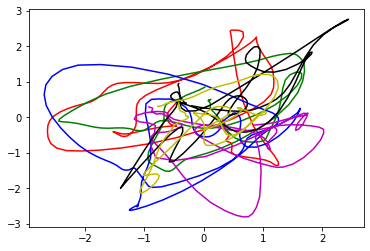

In [177]:
MV = ema
plt.plot(MV[:,0], MV[:,2], 'r', MV[:,3], MV[:,5], 'g', MV[:,6], MV[:,8], 'b', MV[:,9], MV[:,11], 'm',  
         MV[:,12], MV[:,14], 'k',  MV[:,15], MV[:,17], 'y')